In [71]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [72]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [73]:
X_train_full.shape

(60000, 28, 28)

In [74]:
X_train_full.dtype

dtype('uint8')

In [75]:
X_valid,X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000] ,y_train_full[5000:]
X_test = X_test/255.0

In [76]:
y_train


array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

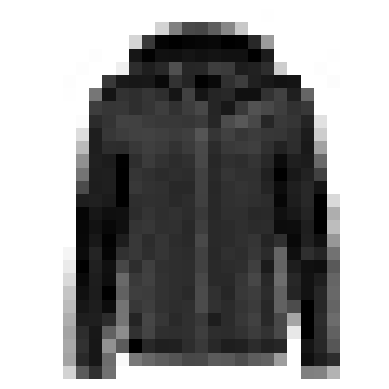

In [77]:

plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [78]:
class_names = ['T-Shirt/Top',"Trouser",'Pullover',"Dress","Coat",'Sandal',"Shirt","Sneaker","bag","Ankle boot"]

In [79]:
X_valid.shape

(5000, 28, 28)

In [80]:
X_test.shape

(10000, 28, 28)

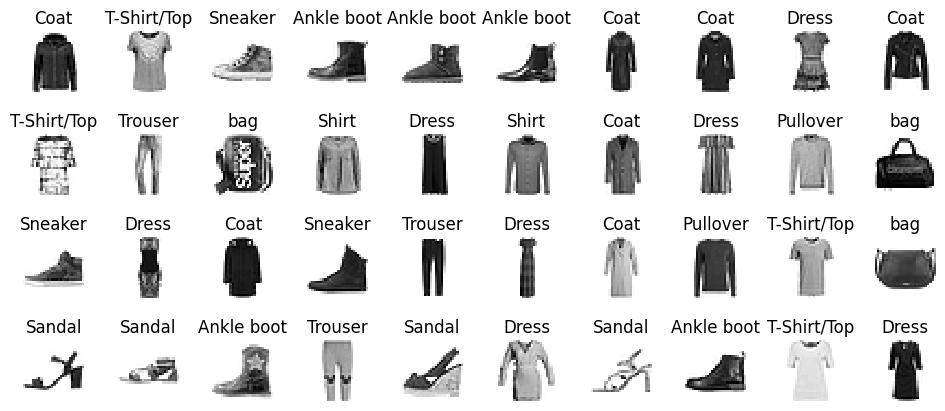

In [81]:
n_rows = 4
n_col = 10
plt.figure(figsize=(n_col*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_col):
        index = row*n_col + col
        plt.subplot(n_rows,n_col,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [82]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

e:\program files\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [85]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
keras.utils.plot_model(model,'fashion.png',show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [87]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [88]:
history = model.fit(X_train,y_train,epochs=15,
                    validation_data=(X_valid,y_valid))

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6679 - loss: 1.0164 - val_accuracy: 0.8200 - val_loss: 0.5253
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8250 - loss: 0.5041 - val_accuracy: 0.8412 - val_loss: 0.4568
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8423 - loss: 0.4500 - val_accuracy: 0.8518 - val_loss: 0.4251
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8516 - loss: 0.4196 - val_accuracy: 0.8596 - val_loss: 0.4030
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8593 - loss: 0.3982 - val_accuracy: 0.8648 - val_loss: 0.3876
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.3817 - val_accuracy: 0.8686 - val_loss: 0.3747
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8688 - loss: 0.3678 - val_accuracy: 0.8722 - val_loss: 0.3659
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8720 - loss: 0.3559

In [89]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8718 - loss: 0.3602


[0.36257269978523254, 0.8711000084877014]

In [90]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [91]:
model.get_layer(hidden1.name) is hidden1

True

In [92]:
weights,biases = hidden1.get_weights()

In [93]:
weights

array([[ 0.0306777 ,  0.01992766,  0.06898971, ..., -0.06890574,
         0.02281667, -0.06572297],
       [-0.01191692,  0.01515806,  0.04526636, ..., -0.04941478,
         0.03319372,  0.04107947],
       [ 0.06446057, -0.04567388, -0.06624685, ...,  0.04666777,
        -0.05595725, -0.00134178],
       ...,
       [ 0.01822353, -0.00279663,  0.0561575 , ..., -0.03043765,
         0.0520371 ,  0.00616329],
       [ 0.00141724,  0.03164833, -0.0647755 , ..., -0.0478011 ,
        -0.02981482, -0.00323368],
       [-0.02161503,  0.05508873, -0.03346645, ..., -0.00629637,
        -0.021139  , -0.07237314]], dtype=float32)

In [94]:
weights.shape

(784, 300)

In [95]:
biases

array([ 2.84289904e-02,  1.37466624e-01,  1.14389360e-02,  4.89148647e-02,
        7.43498579e-02,  1.47590898e-02,  3.49002741e-02, -4.35720496e-02,
       -1.23501597e-02,  2.58460604e-02, -7.60063017e-03, -1.91427432e-02,
       -9.71367481e-05,  1.64176244e-02,  5.57775842e-03,  6.81873262e-02,
       -9.71077196e-03, -1.67679600e-02, -4.18802910e-03,  7.49560520e-02,
       -1.57904867e-02, -4.10053767e-02,  7.62496470e-03,  7.60353357e-02,
        3.09581086e-02,  2.77218055e-02,  7.61833489e-02, -1.75114814e-02,
        8.89090449e-03,  1.30325267e-02,  1.87650695e-02, -2.68224347e-02,
        6.38229540e-03,  6.97695911e-02,  3.19570042e-02,  8.95222574e-02,
        1.07242791e-02,  6.26614392e-02, -5.87795079e-02,  9.94948521e-02,
        1.87544115e-02, -2.11996660e-02,  5.47832139e-02, -3.59693766e-02,
        6.19987845e-02,  1.35177327e-02,  9.12869535e-03, -7.52769038e-02,
        8.71343315e-02,  5.70218116e-02,  5.02304658e-02,  1.97712518e-02,
        2.96212249e-02, -

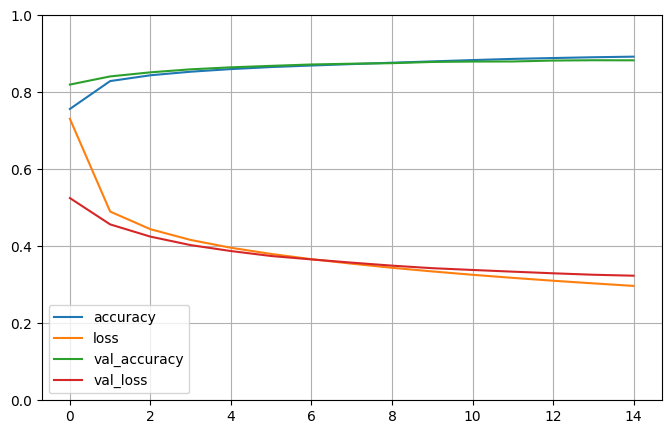

In [96]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [97]:
x_new = X_test[3:6]

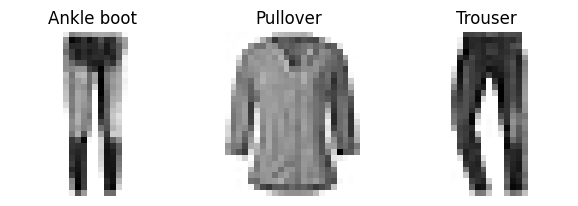

In [98]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,3,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [99]:
y_pred = np.argmax(model.predict(x_new),axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([1, 6, 1], dtype=int64)

In [100]:
np.array(class_names)[y_pred]

array(['Trouser', 'Shirt', 'Trouser'], dtype='<U11')

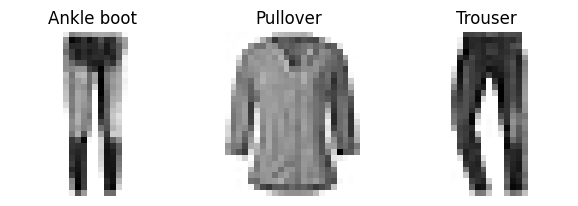

In [101]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,3,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [102]:
img = 'C:\\Users\\Admin\\OneDrive\\Desktop\\minst .jpg'

In [103]:
import cv2 as cv 
import numpy as np

img = cv.imread('digit.jpg',cv.IMREAD_GRAYSCALE)
img = cv.resize(img,(28,28))
img = img/255.0
img = img.reshape(1,28,28)
prediction = model.predict(img)
print(prediction)
predicted_label = np.argmax(prediction)
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[4.1142845e-05 1.6194255e-04 6.0036517e-05 1.5407863e-05 2.3603332e-05
  3.5481634e-08 3.2292188e-05 6.8258672e-08 9.9966300e-01 2.5222812e-06]]
8


In [104]:
print(class_names[predicted_label])

bag
